In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel(r"F:\Data Science\Assignments\7.Clustering\EastWestAirlines.xlsx", 'data')

In [3]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
# Column Rename

data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace = True)

In [5]:
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Data Pre-processing / Exploration

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
data.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
data.duplicated().sum()

0

In [9]:
data[data.duplicated()]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award


##### No missing values and duplicate values are present in data set so we can move to EDA part

# Exploratory Data Analysis

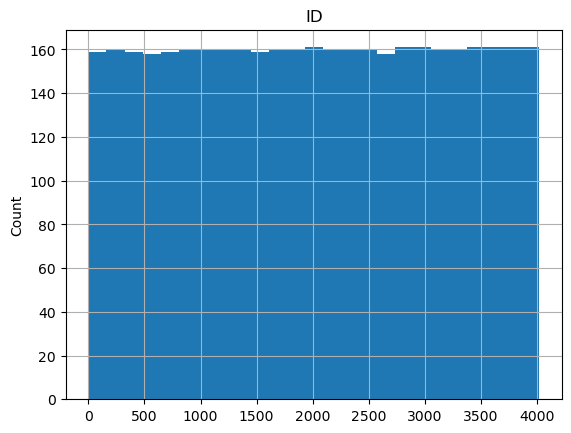

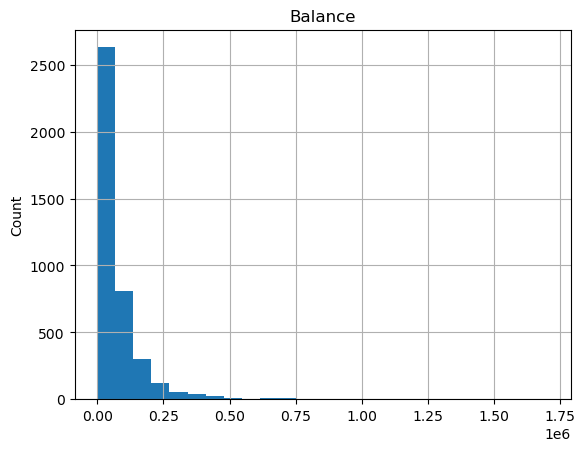

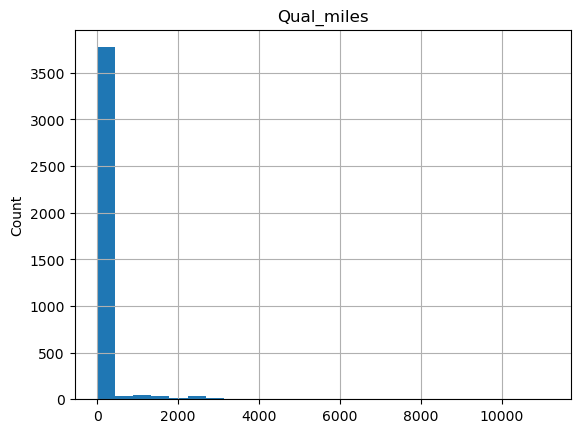

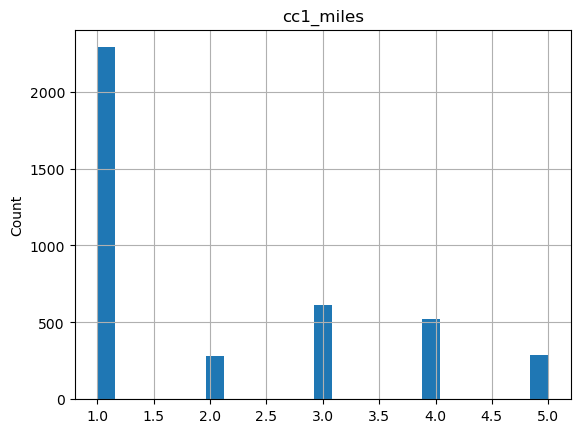

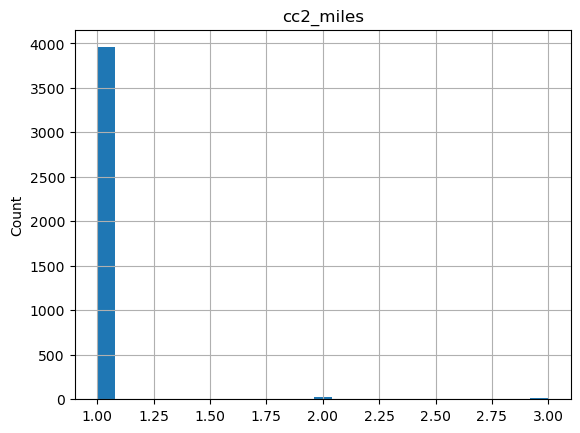

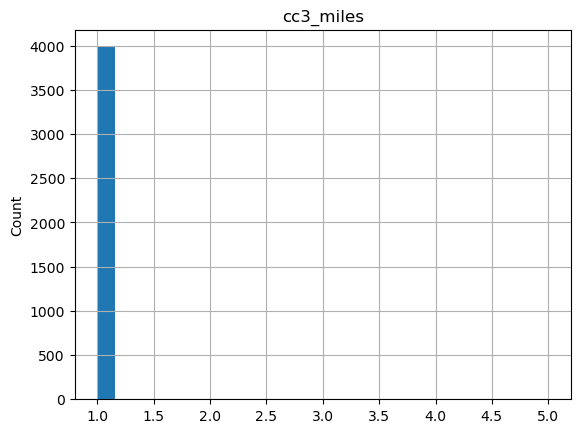

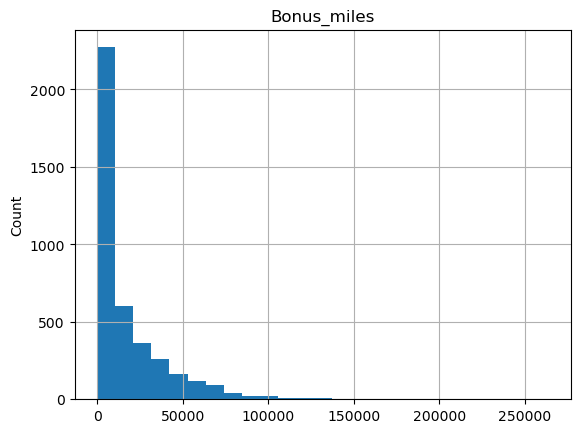

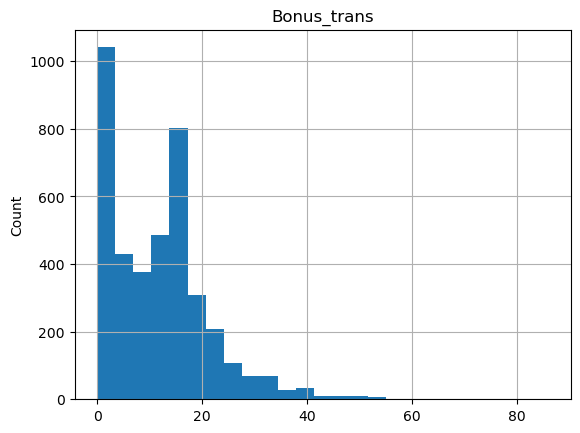

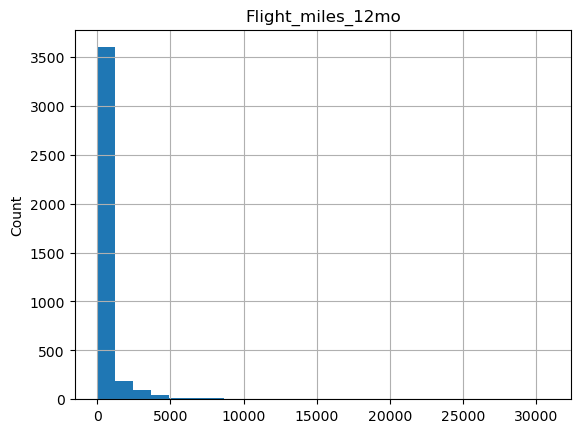

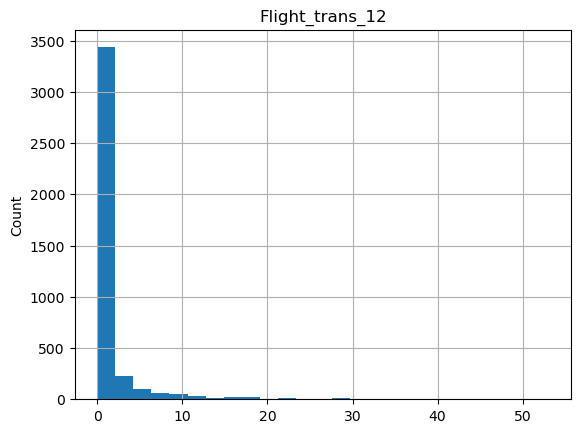

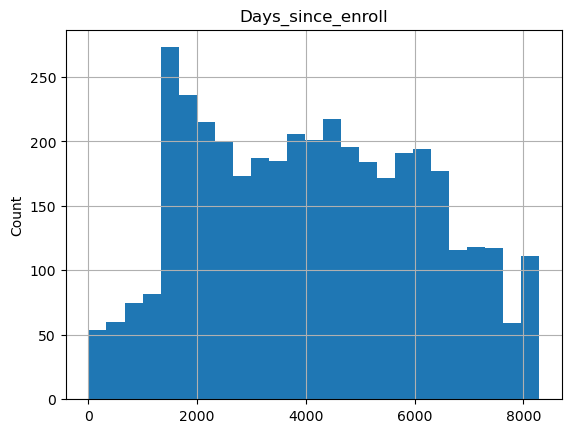

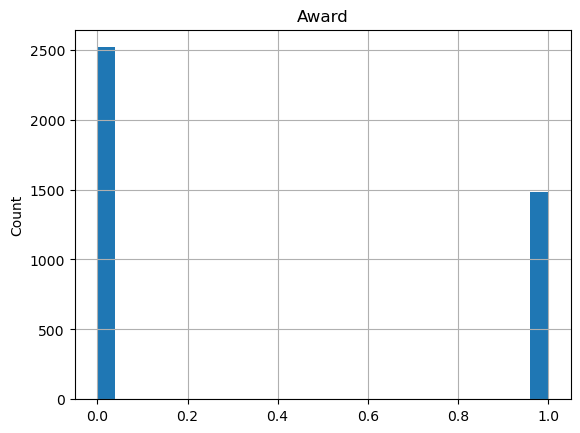

In [10]:
for feature in data.columns:
    data = data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

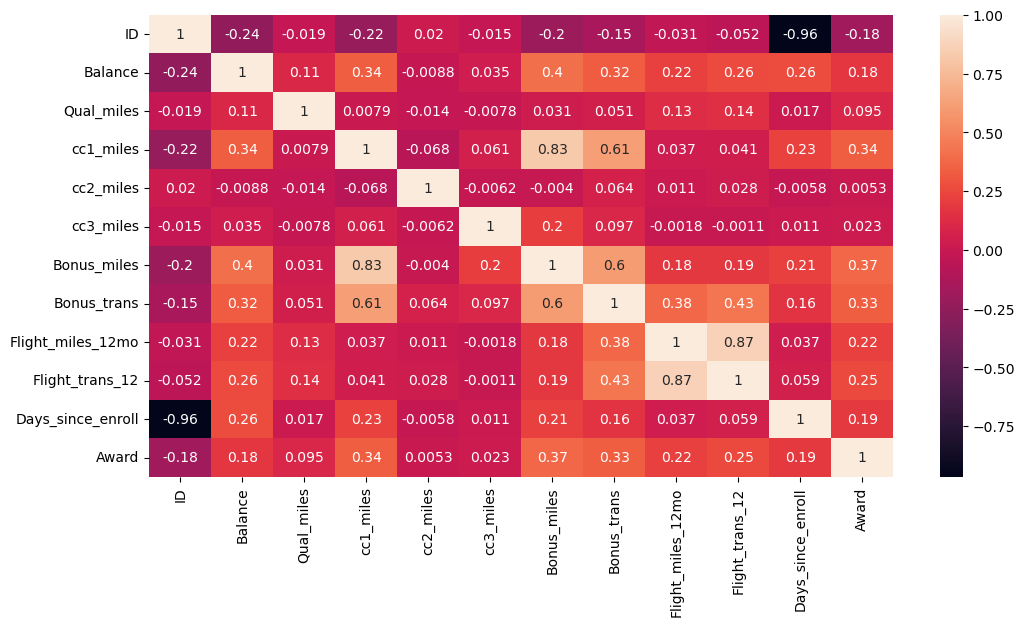

In [11]:
## Checking correlation

plt.subplots(figsize=(12,6))
sns.heatmap(data.corr(), annot=True)
plt.show()


In [12]:
# Applying Feature Scaling technique (Standardization)
df_std = StandardScaler().fit_transform(data)
df_std

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# K-Means Clustering

In [13]:
from sklearn.cluster import KMeans

errors = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, random_state=12)
    kmeans.fit(df_std)
    errors.append(kmeans.inertia_)

In [14]:
errors


[47988.00000000001,
 39018.81421100058,
 34529.13113112969,
 30616.62363609265,
 26894.79995628888,
 23490.742897809356,
 20922.851157620935,
 19413.111928465474,
 17984.808136253025,
 16768.489966541332]

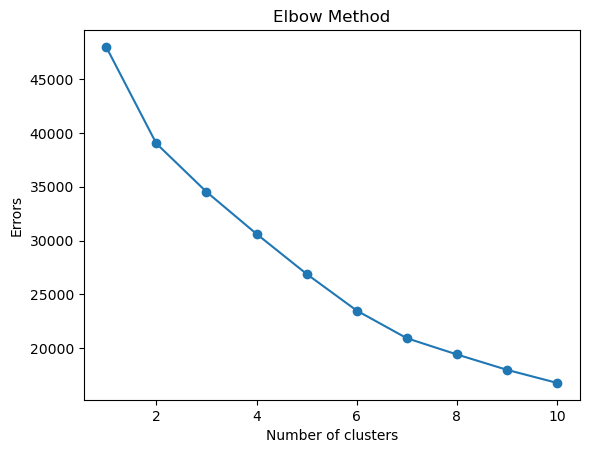

In [15]:
plt.plot(range(1,11),errors, marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("Errors")
plt.title("Elbow Method")
plt.show()

In [16]:
# Build Cluster using K=4

kmeans4 = KMeans(n_clusters=4, random_state=25)

kmeans4.fit_transform(df_std)

array([[7.36202154, 1.54644311, 4.23299014, 3.708573  ],
       [7.34083916, 1.51251438, 4.20382241, 3.68312018],
       [7.1950436 , 1.3940237 , 3.99998177, 3.66051233],
       ...,
       [6.87197716, 3.90777565, 3.36285621, 2.34922742],
       [7.1572728 , 3.42170192, 4.72329335, 1.29649845],
       [7.64334107, 3.49213173, 4.89566591, 1.39956692]])

In [17]:
kmeans4.cluster_centers_

array([[-0.21937913,  1.19293893,  0.85463972,  0.1048172 ,  0.16062214,
        -0.06276658,  0.63532192,  1.6738428 ,  3.59883523,  3.90180833,
         0.26628629,  0.93459683],
       [-0.79159289, -0.16435061, -0.04825387, -0.50585756,  0.02680935,
        -0.05882618, -0.46590113, -0.37645782, -0.16543415, -0.17638578,
         0.77091404, -0.23965222],
       [-0.42834932,  0.54252058,  0.01104681,  1.38834343, -0.08465391,
         0.18385431,  1.19798091,  0.82494974, -0.06750129, -0.07073525,
         0.42727309,  0.66210394],
       [ 0.96477511, -0.33302824, -0.05337351, -0.48091901,  0.01574764,
        -0.06276658, -0.44560585, -0.38567835, -0.18294754, -0.20243324,
        -0.95144756, -0.32058346]])

In [18]:
kmeans4.labels_

array([1, 1, 1, ..., 3, 3, 3])

In [19]:
data['Cluster4_id'] = kmeans4.labels_

In [20]:
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster4_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


In [21]:
data.groupby("Cluster4_id").agg(['mean']).reset_index()

,Cluster4_id,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1760.203822,193805.509554,805.235669,2.203822,1.038217,1.000000,32486.566879,27.675159,5498.547771,16.171975,4668.407643,0.821656
1,1,1096.081538,57040.856923,106.786923,1.363077,1.018462,1.000769,5894.290000,7.986923,228.442308,0.704615,5710.401538,0.254615
2,2,1517.669007,128267.363089,152.659980,3.970913,1.002006,1.048144,46073.626881,19.523571,365.551655,1.105316,5000.825476,0.690070
3,3,3134.555987,40044.381230,102.826537,1.397411,1.016828,1.000000,6384.379288,7.898382,203.922977,0.605825,2153.937864,0.215534


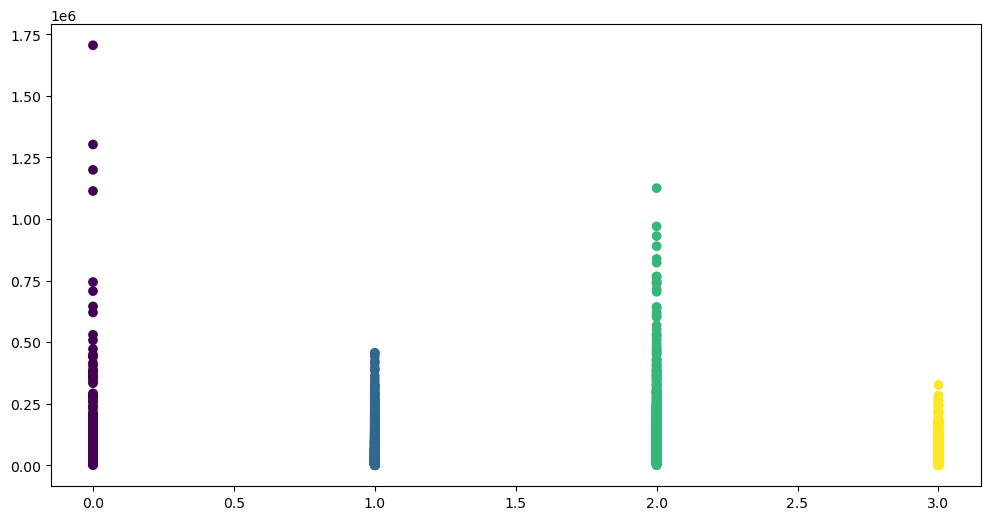

In [22]:
plt.figure(figsize=(12,6))
plt.scatter(data['Cluster4_id'], data['Balance'], c=kmeans4.labels_)

# Building Cluster using K=5

In [23]:
kmeans5 = KMeans(n_clusters= 5, random_state=25)
kmeans5.fit_transform(df_std)

array([[ 1.53776019,  7.37671519, 16.70697649,  3.70249964,  4.1890329 ],
       [ 1.50388357,  7.35561686, 16.6941935 ,  3.67742956,  4.15956157],
       [ 1.38546689,  7.20961551, 16.61267341,  3.65683171,  3.95931663],
       ...,
       [ 3.91547837,  6.89428418, 16.3552742 ,  2.38313407,  3.27849734],
       [ 3.4192522 ,  7.17716715, 16.77420091,  1.26868848,  4.64558023],
       [ 3.48970965,  7.66360819, 16.83862609,  1.36808714,  4.81734504]])

In [24]:
kmeans5.cluster_centers_

array([[-0.79229548, -0.16448107, -0.06044523, -0.51205951,  0.02787651,
        -0.05879255, -0.46839959, -0.37994341, -0.16471941, -0.17582311,
         0.77198835, -0.25121812],
       [-0.22708278,  1.20284695,  0.8613124 ,  0.10111012,  0.16228153,
        -0.06276658,  0.63485991,  1.68030149,  3.607528  ,  3.91562026,
         0.27255539,  0.93222938],
       [-0.30152248,  0.63971926, -0.08443292,  1.0220844 , -0.09824189,
        15.64629931,  3.17969131,  1.71461374,  0.03329269,  0.05969539,
         0.23987261,  0.33752735],
       [ 0.96654352, -0.33852517, -0.05220254, -0.50240426,  0.0178516 ,
        -0.06276658, -0.45766231, -0.40578147, -0.18758682, -0.2064372 ,
        -0.95564264, -0.34920258],
       [-0.39631105,  0.51694606,  0.02349012,  1.3611424 , -0.08498629,
        -0.05274208,  1.12652375,  0.79987408, -0.06495228, -0.07038255,
         0.39970661,  0.6879352 ]])

In [25]:
kmeans5.labels_

array([0, 0, 0, ..., 3, 3, 3])

In [26]:
data['Cluster5_id'] = kmeans5.labels_

In [27]:
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster4_id,Cluster5_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3,3


In [28]:
data.groupby("Cluster5_id").agg(['mean']).reset_index()

,Cluster5_id,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster4_id
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1095.266098,57027.711404,97.356090,1.354538,1.018619,1.000776,5833.957331,7.953452,229.442979,0.706749,5712.619860,0.249030,1.001552
1,1,1751.262821,194803.871795,810.397436,2.198718,1.038462,1.000000,32475.410256,27.737179,5510.717949,16.224359,4681.352564,0.820513,0.000000
2,2,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,2.000000
3,3,3136.608438,39490.493738,103.732367,1.367831,1.017139,1.000000,6093.240606,7.705339,197.427818,0.590639,2145.275544,0.201714,2.997363
4,4,1554.853229,125690.396282,162.285714,3.933464,1.001957,1.001957,44348.083170,19.282779,369.120352,1.106654,4943.904110,0.702544,2.016634


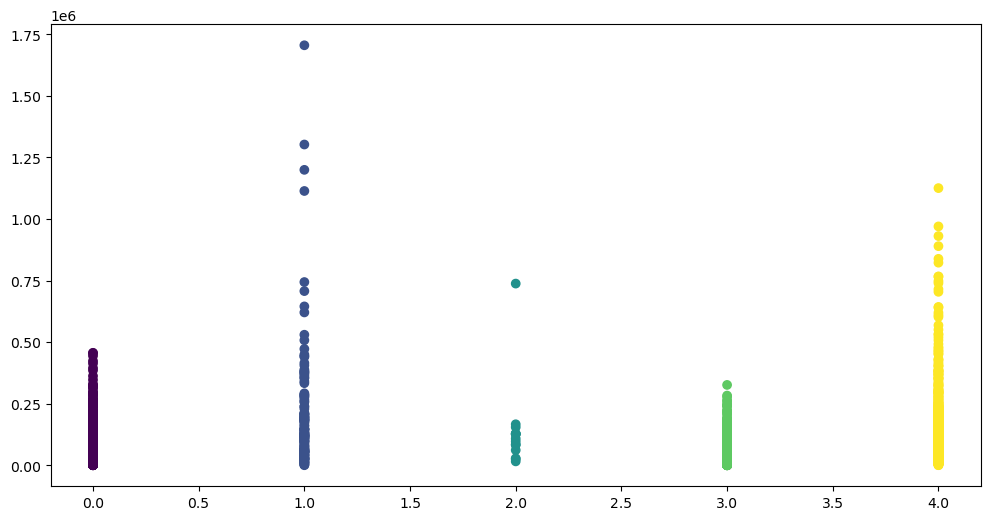

In [29]:
plt.figure(figsize=(12,6))
plt.scatter(data['Cluster5_id'], data['Balance'], c=kmeans5.labels_)

# Hierarchical Clustering

In [30]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [31]:
air = pd.read_excel(r"F:\Data Science\Assignments\7.Clustering\EastWestAirlines.xlsx", 'data')

In [32]:
air.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace = True)
air

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [33]:
air.drop(['ID'], axis=1, inplace=True)

In [34]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

air_norm = MinMaxScaler().fit_transform(air)

In [35]:
air_norm = pd.DataFrame(air_norm, columns=air.columns)
air_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


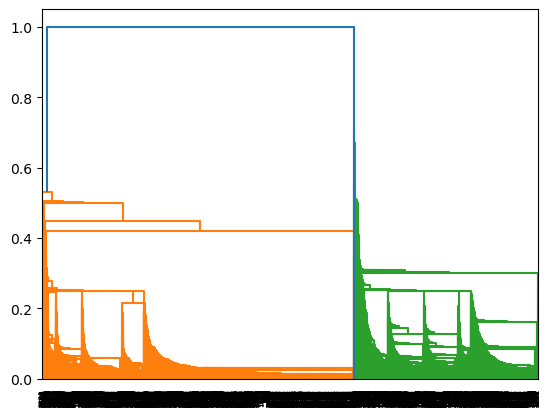

In [43]:
dendrogram = sch.dendrogram(sch.linkage(air_norm, method='single'))

In [37]:
#Cluster Creation

hc = AgglomerativeClustering(n_clusters=3, affinity= 'euclidean', linkage='single')
hc

AgglomerativeClustering(linkage='single', n_clusters=3)

In [38]:
y_hc = hc.fit_predict(air_norm)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [39]:
clusters = pd.DataFrame(y_hc, columns=['cluster_id'])
clusters

,cluster_id
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [40]:
# Add cluster to dataset
air['cluster_id'] = clusters
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [41]:
air['cluster_id'].value_counts()

1    2518
0    1480
2       1
Name: cluster_id, dtype: int64

In [42]:
air.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,97010.442568,240.020946,2.662838,1.015541,1.018243,28876.327703,15.735135,837.258108,2.565541,4627.259459,1.0
1,1,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
2,2,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0


# DBSCAN

In [44]:
from sklearn.cluster import DBSCAN

In [45]:
data = pd.read_excel(r"F:\Data Science\Assignments\7.Clustering\EastWestAirlines.xlsx", 'data')

In [46]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [47]:
data.drop(['ID#'], axis=1, inplace=True)

In [48]:
df_std = StandardScaler().fit_transform(data)

In [53]:
df_std = pd.DataFrame(df_std, columns= data.columns)
df_std.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [54]:
df_std.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [55]:
dbscan = DBSCAN(eps=3, min_samples=12)

In [56]:
dbscan.fit_predict(df_std)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
dbscan.labels_  #Noisy samples are given by -1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
clusters = pd.DataFrame(dbscan.labels_, columns=['cluster'])

In [59]:
data['Clusters'] = clusters
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [60]:
data['Clusters'].value_counts()

 0    3874
-1      87
 1      25
 2      13
Name: Clusters, dtype: int64